# Exact simulation of the 3/2 model

Different from Baldeaux ([2012](https://doi.org/10.1142/S021902491250032X)), we use an almost exact way to calculate the option price under the 3/2 model. The dynamics of the stock price under the 3/2 model under the risk-neutral measure are given by

$$
 \frac{dS_t}{S_t} = rdt + \sqrt{V_t}\rho dW_t^1 + \sqrt{V_t}\sqrt{1-\rho^2}dW_t^2 \tag{1}
$$

$$
 dV_t = \kappa V_t (\theta - V_t)dt + \epsilon V_t^{3/2}dW_t^1 \tag{2}
$$

where $W_t^1$ and $W_t^2$ are independent Brownian motions. Regarding the parameters, $r$ represents the constant interest rate, $\rho$ the instantaneous correlation between the return on the stock and the variance process and $\epsilon$ governs the volatility of volatility. The speed of mean reversion is given by $\kappa V_t$ and $\theta$ denotes the long-run mean of the variance process.

Defining $X_t = \frac{1}{V_t}$, we obtain

$$
dX_t = (\kappa + \epsilon^2 - \kappa\theta X_t)dt - \epsilon \sqrt{X_t}dW_t^1 \tag{3}
$$



## Part 1: Almost Exact MC Method:

### Step 1): Simulating $X_T$

$X_T$ is distributed as a noncentral $ \chi^2 $ distribution

$$
\frac{X_T{\rm exp}\lbrace \kappa \theta T \rbrace}{c(T)} \sim \chi^2(\delta, \alpha)
$$

where
$$
\delta = \frac{4(\kappa + \epsilon^2)}{\epsilon^2}, \quad \alpha = \frac{X_0}{c(T)}, \quad c(T) = \frac{\epsilon^2({\rm exp}\lbrace \kappa\theta T \rbrace - 1)}{4\kappa\theta}
$$

### Step 2): Simulating $\int_0^T \frac{ds}{X_s}$ Given $X_T$

Let $X_t$ be given by Eq. (3), then the Laplace transform of the conditional distribution of $\int_0^t \frac{ds}{X_s}|X_t$ is

$$
E\left({\rm exp}\left\lbrace -a^* \int_0^t \frac{ds}{X_s} \ \bigg| \ X_t \right\rbrace \right) = \frac{I_{\sqrt{\nu^2+8a^*/\epsilon^2}}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}{I_{\nu}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}
$$


where $I_{\nu}(z)$ denotes the modified Bessel function of the first kind, $\delta = \frac{4(\kappa + \epsilon^2)}{\epsilon^2}$ and $\nu = \frac{\delta}{2} - 1$. By setting $a^* = -ia$ we obtain the characteristic function $\Phi(a)$

The characteristic function of $\int_0^t \frac{ds}{X_s}|X_t$ is

$$
\Phi(a) = E\left({\rm exp}\left\lbrace ia \int_0^t \frac{ds}{X_s} \ \bigg| \ X_t \right\rbrace \right) = \frac{I_{\sqrt{\nu^2-8ia/\epsilon^2}}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}{I_{\nu}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}
$$

### Step 3):  Approximate the Distribution of $V_T$  $:= \frac{1}{X_T}$

Approximate $V_T$ with Log-normal distribution by matching the first and second moment $E(V_T|v_T)$, $E(V_T^2|v_T)$, and we can get

$$ \mu = M_1,    \sigma = \sqrt \frac{M_2}{M_1^2}$$


### Step 4):  Calculate Option Price

The SDE in a de-correlated form:
$$dS_t = \sigma_t(\rho dZ_t+\sqrt{1-\rho^2}dX_t),   with dX_tdZ_t=0.$$

Randomly picking a path given $V_T$, and we can get $ \int_0^T\sigma_t^2dt$

Under normal model ($\beta=0$): 

$$S_T=S_0+\frac{\rho}{\epsilon}(X_T-X_0-k\theta T+(k+\frac{1}{2}\epsilon^2)\int_0^T\sigma_t^2dt)+\sqrt{(1-\rho^2)V_T}X_1$$

and the option price is from the normal model:

$$C_N(K,S_0:=S_0+\frac{\rho}{\epsilon}(X_T-X_0-k\theta T+(k+\frac{1}{2}\epsilon^2)\int_0^T\sigma_t^2dt, \sigma_N := \sqrt{(1-\rho^2)V_T/T}  )$$

Under BSM model ($\beta=1$): 

$$log(\frac{S_T}{S_0})=\frac{\rho}{\epsilon}(log(\frac{X_0}{X_T})-k(\theta T-(1+\frac{\epsilon^2}{2k})V_T))-\frac{1}{2}V_T+\sqrt{(1-\rho^2)V_T}X_1$$

And the option price is from the BSM formula:

$$C_{BS}(K,S_0e^{\frac{\rho}{\epsilon}(log(\frac{X_0}{X_T})-k(\theta T-(1+\frac{\epsilon^2}{2k})V_T))-\frac{\rho^2}{2}I_T},\sqrt{(1-\rho^2)V_T/T})$$
Furthermore, we consider three versions of almost exact MC:

Version 1: Use abs() remediation on moments calculation

Version 2: With $M1$ as the simulation of $U_T$


## Part 2: Numerical Tests:


Baldeaux ([2012](https://doi.org/10.1142/S021902491250032X)) chooses the following set of parameters and gives the reference option price **0.443059** (Case I)

$$
S_0 = 1, \quad K = 1, \quad \kappa = 2, \quad \theta = 1.5, \quad \epsilon = 0.2,
$$

$$
\rho = -0.5, \quad V_0 = 1, \quad T = 1, \quad r = 0.05
$$


|Parameters | Case I | 
|:- - - |- - - -|
|$S_0$| 1 |
|$K$| 1 |
|$\kappa$| 2 |
|$\theta$|1.5|
|$\epsilon$|0.2|
|$\rho$|-0.5|
|$V_0$|1|
|$r$|0.05|
|$T$|1|
|Reference option price|0.443059|


IRO RENE KOUARFATE, MICHAEL A. KOURITZIN, AND ANNE MACKAY (2020) choose the following parameters and calculate the exact price (Case II to Case V):


|Parameters | Case II | Case III | Case IV | Case V |
|:- - - |- - - -|- - - -|- - - -|- - - -|
|$$S_0$$|100|100|100|100|
|$$\kappa$$|22.84|18.32|19.76|20.48|
|$$\theta$$|0.218|0.218|0.218|0.218|
|$$\epsilon$$|8.56|8.56|3.20|3.20|
|$$\rho$$|-0.99|-0.99|-0.99|-0.99|
|$$V_0$$|0.06|0.06|0.06|0.06|
|$$r$$|0.00|0.00|0.00|0.00|
|$$T$$|0.5|0.5|0.5|0.5|

The exact prices of European call options under different $K$ will be as following:

|$$K/S_0$$| Case II | Case III | Case IV | Case V |
|:- - - |- - - -|- - - -|- - - -|- - - -|
|0.95|10.364|10.055|11.657|11.724|
|1|7.386|7.042|8.926|8.999|
|1.05|4.938|4.586|6.636|6.710|


In [1]:
import sys, os
sys.path.insert(0, 'E:\研究生课程\研二下学期\应用随机过程\Finalproject\local\PyFENG')
sys.path.insert(0, 'D:/我的文档/在校用的/20212/ASP/Final_Project/PyFeng')
import pyfeng as pf
pf

<module 'pyfeng' from 'D:/我的文档/在校用的/20212/ASP/Final_Project/PyFeng\\pyfeng\\__init__.py'>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Case 1.1

In [3]:
amec = pf.Sv32McAe(S0=1, Ks=1, T=1,r=0.05, sigma_0=1, beta=1, rho=-0.5, theta=1.5, kappa=2, vov=0.2, path_num = 1000, cp=1)
output1 = amec.optionPrice_version1()
output2 = amec.optionPrice_version2()
print('In version_1, the mean of prices is {}, and the std of prices is {}'.format(output1[0][0],output1[1][0]))
print('In version_2, the mean of prices is {}, and the std of prices is {}'.format(output2[0][0],output2[1][0]))

In version_1, the mean of prices is 53.14686069810808, and the std of prices is 101.31712409500615
In version_2, the mean of prices is 0.37307672135119335, and the std of prices is 0.3399348019950051


|Parameters | Case I | 
|:- - - |- - - -|
|$S_0$| 1 |
|$K$| 1 |
|$\kappa$| 2 |
|$\theta$|1.5|
|$\epsilon$|0.2|
|$\rho$|-0.5|
|$V_0$|1|
|$r$|0.05|
|$T$|1|
|Reference option price|0.443059|

We can see that following the Almost Exact MC exactly in this occasion comes to a very odd result. While with the method we innovated on, the outcome is much more reasonable.

|Parameters | Case II | Case III | Case IV | Case V |
|:- - - |- - - -|- - - -|- - - -|- - - -|
|$$S_0$$|100|100|100|100|
|$$\kappa$$|22.84|18.32|19.76|20.48|
|$$\theta$$|0.218|0.218|0.218|0.218|
|$$\epsilon$$|8.56|8.56|3.20|3.20|
|$$\rho$$|-0.99|-0.99|-0.99|-0.99|
|$$V_0$$|0.06|0.06|0.06|0.06|
|$$r$$|0.00|0.00|0.00|0.00|
|$$T$$|0.5|0.5|0.5|0.5|

### Case-II

In [4]:
S0=100
Ks = np.array([95,100,105])
amec = pf.Sv32McAe(S0, Ks, T=1,r=0.000, sigma_0=0.245, beta=1, rho=-0.99, theta=0.218, kappa=22.84, vov=8.56, path_num = 1000, cp=1)
output1 = amec.optionPrice_version1()
output2 = amec.optionPrice_version2()

In [5]:
pd.DataFrame(output1, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks])

,K=95,K=100,K=105
Price_mean,0.0,0.0,0.0
Price_std,0.0,0.0,0.0


In [6]:
pd.DataFrame(output2, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks])

,K=95,K=100,K=105
Price_mean,7.526255,5.049878,3.174987
Price_std,9.342868,7.616823,5.887329


|$$K/S_0$$| Case II |
|:- - - |- - - -|
|0.95|10.364|
|1|7.386|
|1.05|4.938|

In [7]:
S0=100
Ks=np.linspace(50, 150, num=50, endpoint=True, retstep=False, dtype=None)
T=np.linspace(1, 10, num=20, endpoint=True, retstep=False, dtype=None)
Z = np.zeros([len(T),len(Ks)])

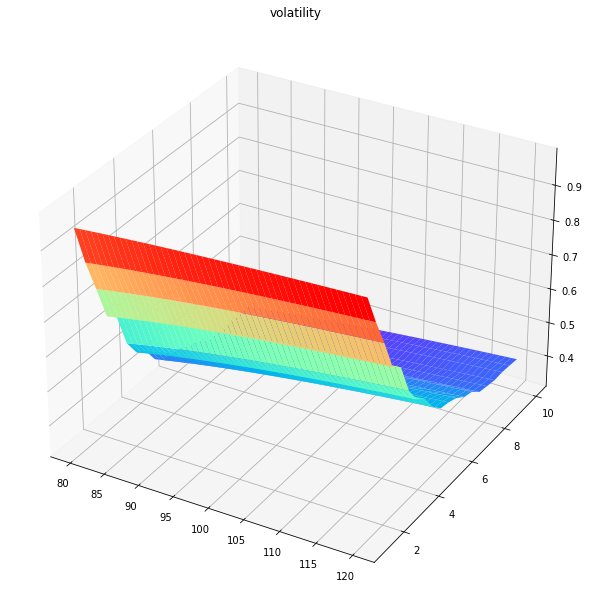

In [8]:
S0=100
Ks=np.linspace(80, 120, num=50, endpoint=True, retstep=False, dtype=None)
T=np.linspace(1, 10, num=20, endpoint=True, retstep=False, dtype=None)
Z = np.zeros([len(T),len(Ks)])
for idx,t in enumerate(T):
    amec = pf.Sv32McAe(S0, Ks, t ,r=0.05, sigma_0=1, beta=1, rho=-0.5, theta=1.5, kappa=2, vov=0.2, path_num = 100, cp=1)
    amec.optionPrice_version2()
    Z[idx,:] = amec.impliedVolatility1()

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
delta = 0.5
# 对x、y数据执行网格化
X, Y = np.meshgrid(Ks,T)

# 绘制3D图形
ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
# 设置Z轴范围
# ax.set_zlim(-2, 2)
# 设置标题
plt.title("volatility")
plt.show()

### Case-III

|Parameters | Case III |
|:- - - |- - - -|
|$$S_0$$|100|
|$$\kappa$$|18.32|
|$$\theta$$|0.218|
|$$\epsilon$$|8.56|
|$$\rho$$|-0.99|
|$$V_0$$|0.06|
|$$r$$|0.00|
|$$T$$|0.5|

In [9]:
S0 = 100
Ks = np.array([95,100,105])
amec = pf.Sv32McAe(S0, Ks, T=0.5,r=0.000, sigma_0=0.245, beta=0, rho=-0.99, theta=0.218, kappa=18.32, vov=8.56, path_num = 1000, cp=1)
output1 = amec.optionPrice_version1()
output2 = amec.optionPrice_version2()

In [10]:
pd.DataFrame(output1, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks])

,K=95,K=100,K=105
Price_mean,4.018130e-90,0.0,0.0
Price_std,1.269916e-88,0.0,0.0


In [11]:
pd.DataFrame(output2, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks])

,K=95,K=100,K=105
Price_mean,4.993905,0.059259,0.0
Price_std,0.159519,0.072469,0.0


|$$K/S_0$$| Case III |
|:- - - |- - - -|
|0.95|10.055|
|1|7.042|
|1.05|4.586|

### Case-IV

|Parameters | Case IV |
|:- - - |- - - -|
|$$S_0$$|100|
|$$\kappa$$|19.76|
|$$\theta$$|0.218|
|$$\epsilon$$|3.20|
|$$\rho$$|-0.99|
|$$V_0$$|0.06|
|$$r$$|0.00|
|$$T$$|0.5|

In [12]:
S0=100
Ks = np.array([95,100,105])
amec = pf.Sv32McAe(S0, Ks, T=0.5,r=0.000, sigma_0=0.245, beta=0, rho=-0.99, theta=0.218, kappa=19.76, vov=3.20, path_num = 1000, cp=1)
output1 = amec.optionPrice_version1()
output2 = amec.optionPrice_version2()

In [13]:
pd.DataFrame(output1, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks])

,K=95,K=100,K=105
Price_mean,2.924688e-79,0.0,0.0
Price_std,9.244051e-78,0.0,0.0


In [14]:
pd.DataFrame(output2, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks])

,K=95,K=100,K=105
Price_mean,5.004022,0.082600,0.0
Price_std,0.205229,0.105113,0.0


|$$K/S_0$$| Case IV |
|:- - - |- - - -|
|0.95|11.657|
|1|8.926|
|1.05|6.636|

### Case V

|Parameters | Case V |
|:- - - |- - - -|
|$$S_0$$|100|
|$$\kappa$$|20.48|
|$$\theta$$|0.218|
|$$\epsilon$$|3.20|
|$$\rho$$|-0.99|
|$$V_0$$|0.06|
|$$r$$|0.00|
|$$T$$|0.5|

### Case V

In [15]:
S0=100
Ks = np.array([95,100,105])
amec = pf.Sv32McAe(S0, Ks, T=0.5,r=0.000, sigma_0=0.245, beta=0, rho=-0.99, theta=0.218, kappa=20.48, vov=3.20, path_num = 1000, cp=1)
output1 = amec.optionPrice_version1()
output2 = amec.optionPrice_version2()

In [16]:
pd.DataFrame(output1, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks])

,K=95,K=100,K=105
Price_mean,2.510311e-94,0.0,0.0
Price_std,6.756875e-93,0.0,0.0


In [17]:
pd.DataFrame(output2, index = ['Price_mean','Price_std'], columns=['K={}'.format(K) for K in Ks])

,K=95,K=100,K=105
Price_mean,4.995460,0.080928,0.0
Price_std,0.209936,0.109522,0.0


|$$K/S_0$$| Case V |
|:- - - |- - - -|
|0.95|11.724|
|1|8.999|
|1.05|6.710|

In [18]:
amec.BSM (100,95,0.0,0.5,0.245,1)

9.522167349987846

## Part 4: Analysis:

Strengths:

Compared with exact MC method, almost exact MC method is not that time-consuming. For exact MC method, the most time consuming step when sampling from the conditional distribution is the evaluation of the modified Bessel function of the first kind, $I_\nu(z)$, which has to be evaluated at **complex** $\nu$.Besides, drawing random from numerical CDF is also slow. However, for almost exact method, it supposes $V_T$ subjects to an easy and well-known distribution by matching fisrt and second moment, which saves much time.

Weaknesses:

Almost exact MC is also time-consuming compared with conditional MC. Besides, the outcome we get right now is not accurate. Maybe we need further analysis, e.g inverse gaussian.